In [1]:
# Description: Temperature plots of synop observations in different cartopy
#              projections taken from [1].
# Reference: [1]: https://scitools.org.uk/cartopy/docs/latest/reference/projections.html

In [1]:
def read_synop_data(filename):
    """
    Reads latitude (MLAH), longitude (MLOH), and temperature (MTDBT) from a NetCDF file.

    Parameters:
    filename (str): Path to the NetCDF file.

    Returns:
    tuple: (lats, lons, temps) - Arrays containing latitude, longitude, and temperature values.
    """
    from netCDF4 import Dataset
    import numpy as np
    # Open the NetCDF file
    ncfile = Dataset(filename, 'r')

    # Read latitude, longitude, and temperature variables
    try:
        lats = ncfile.variables["MLAH"][:]
        lons = ncfile.variables["MLOH"][:]
        temps = ncfile.variables["MTDBT"][:]  # Assuming MTDBT is temperature
        
        # Convert to numpy arrays
        lats = np.array(lats)
        lons = np.array(lons)
        temps = np.array(temps)

    except KeyError as e:
        print(f"Error: Variable {e} not found in file.")
        lats, lons, temps = None, None, None

    # Close the NetCDF file
    ncfile.close()

    return lats, lons, temps

# Example usage
filename = "synop.nc"
lats, lons, temps = read_synop_data(filename)

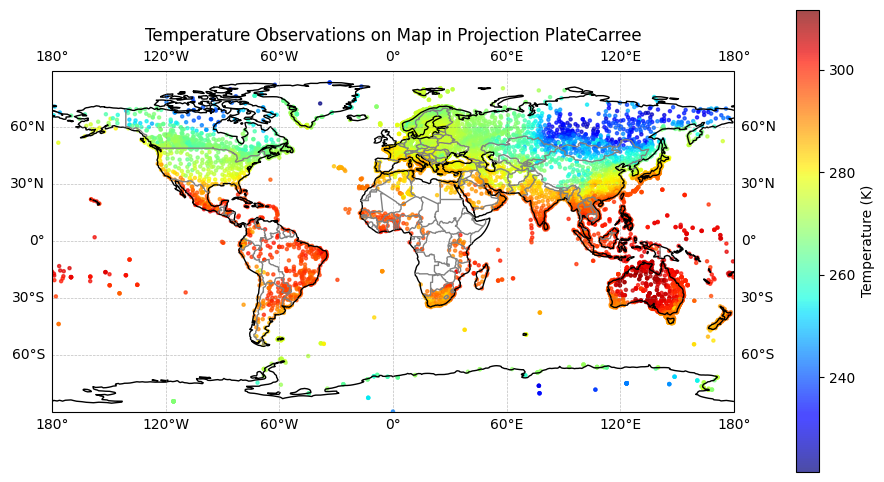

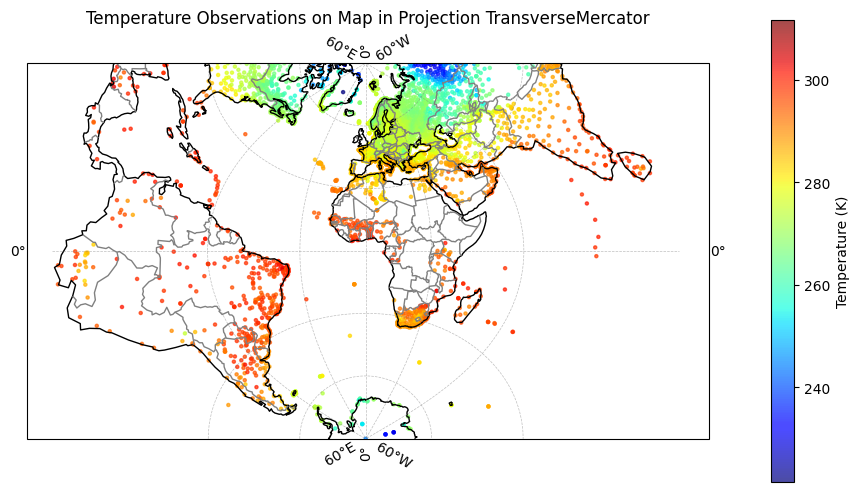

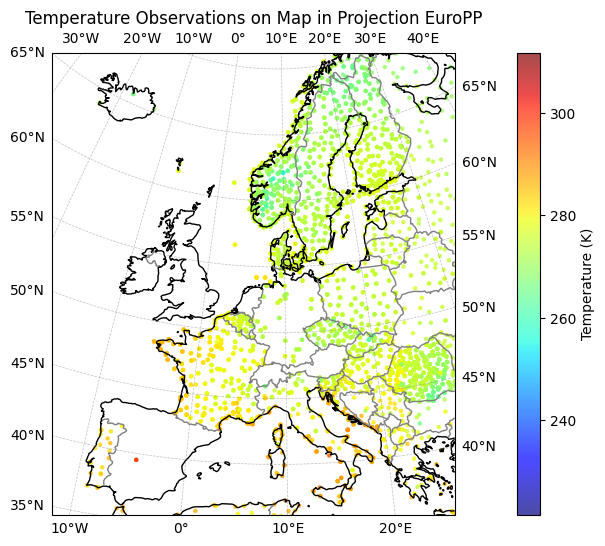

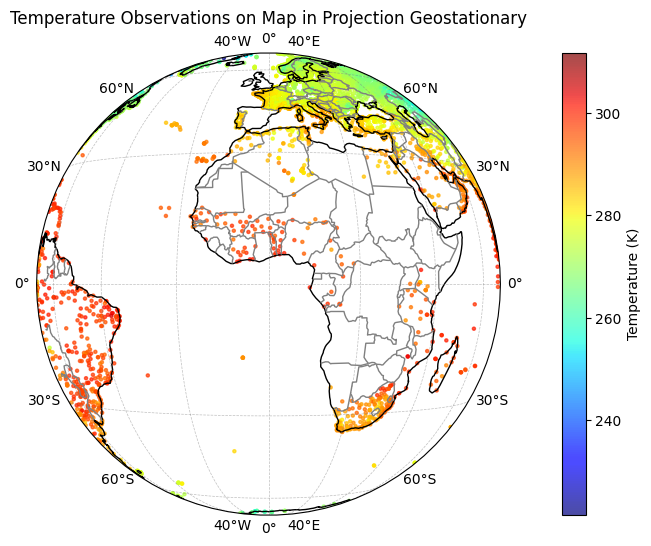

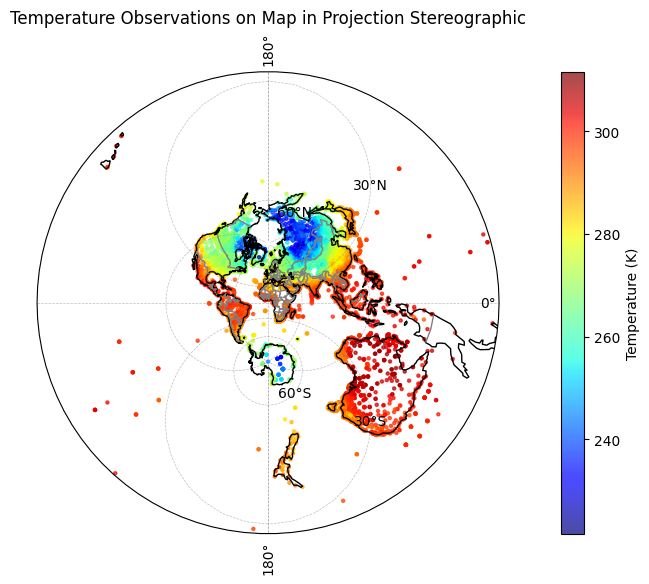

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_temperature_map(lats,
                         lons,
                        temps,
                        filename="synop.png",
                        threshold=1e+20, 
                        projections = [[ccrs.PlateCarree(), "PlateCarree"]]):
    """Plots temperature observations on a map, removes large missing values, ensures proper colorbar spacing, and saves the figure."""

    # Filter out large missing values
    valid_mask = (temps < threshold) & np.isfinite(temps)
    lats, lons, temps = lats[valid_mask], lons[valid_mask], temps[valid_mask]


    for projection in projections:
        # Create figure with proper aspect ratio
        fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection[0]})

        # Scatter plot with temperature data
        scatter = ax.scatter(lons, lats, c=temps, cmap='jet', s=5, alpha=0.7, transform=ccrs.PlateCarree())

        # Add map features
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, edgecolor='gray')
        ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

        # Add colorbar with better spacing
        cbar = plt.colorbar(scatter, ax=ax, fraction=0.04, pad=0.08)  
        cbar.set_label("Temperature (K)")

        # Set title
        plt.title("Temperature Observations on Map in Projection " + projection[1])

        # Save and show the plot
        plt.savefig(filename[0:-4] + "_" + projection[1] + ".png", dpi=300, bbox_inches="tight")
        plt.show()

# Example usage
plot_temperature_map(lats, 
                     lons, 
                     temps, 
                     projections=[[ccrs.PlateCarree(), "PlateCarree"], 
                                  [ccrs.TransverseMercator(), "TransverseMercator"],
                                  [ccrs.EuroPP(), "EuroPP"],
                                  [ccrs.Geostationary(), "Geostationary"],
                                  [ccrs.Stereographic(), "Stereographic"]])
